In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('/Users/aamirpirani/Desktop/Data_Analysis/IE & Google Data Analysis Competition/Data/hotel_bookings.csv')

## Data Inspection

In [3]:
print(data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
print(data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
print(data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

## Data Cleaning

### Handling Missing Values 

In [7]:
data['children'].fillna(data['children'].median(), inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)

In [8]:
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

data['children'].fillna(data['children'].median(), inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)

### Converting categorical variables to appropriate data types

In [9]:
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

## Feature Engineering

In [10]:
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str))
data['days_until_arrival'] = (data['arrival_date'] - pd.to_datetime(data['reservation_status_date'])).dt.days

## Univariate Analysis

### Distibution of Numerical Features

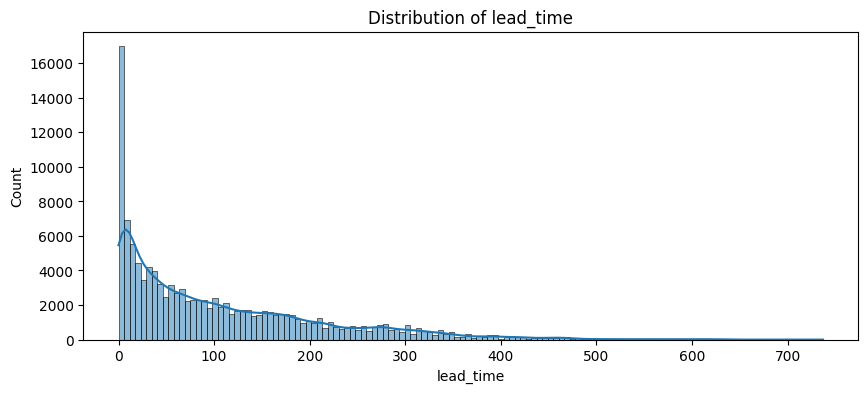

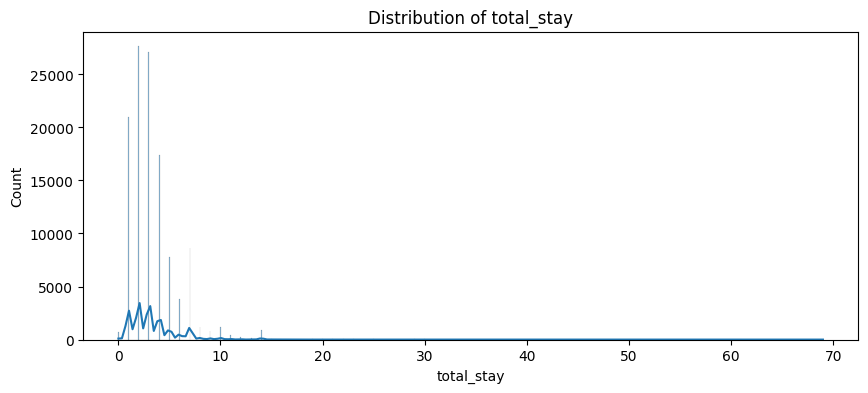

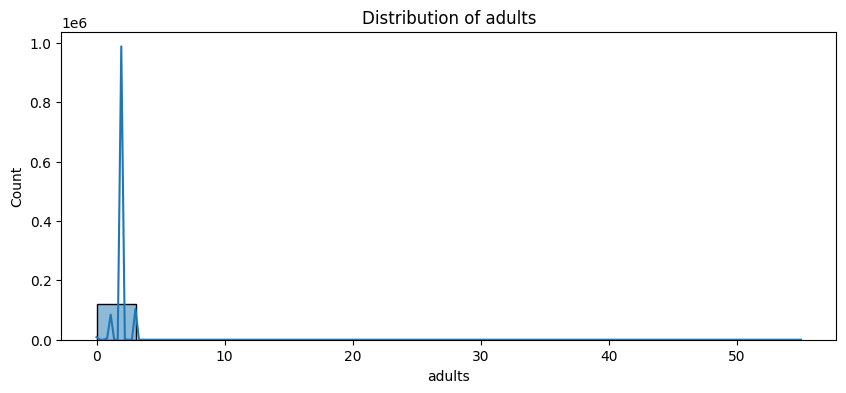

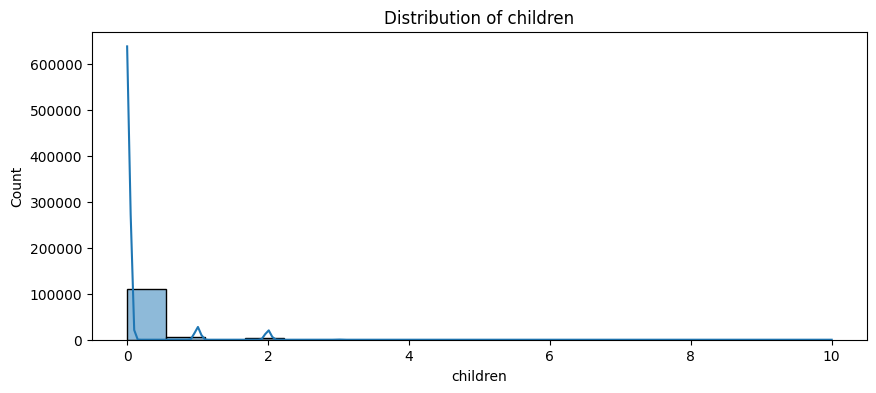

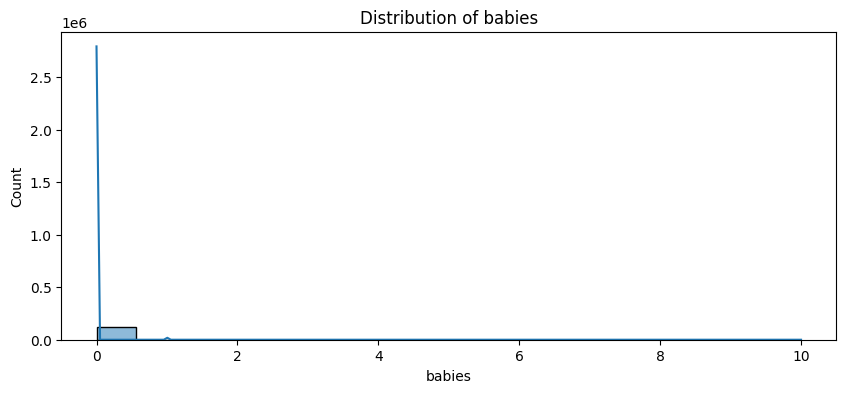

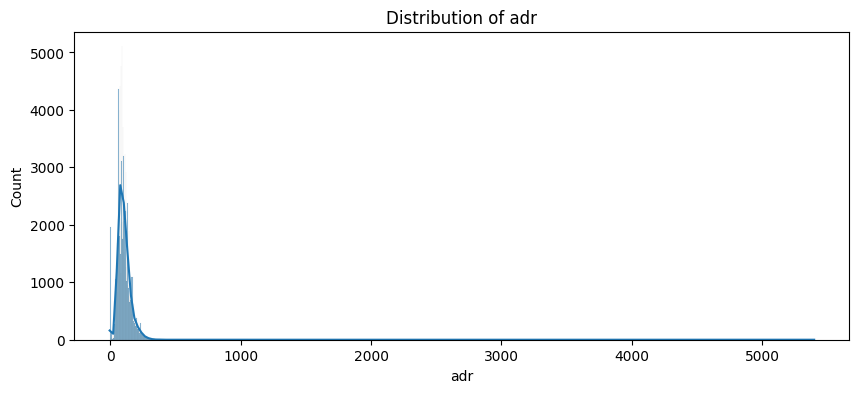

In [11]:
numerical_features = ['lead_time', 'total_stay', 'adults', 'children', 'babies', 'adr']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Distribution of Categorical Features

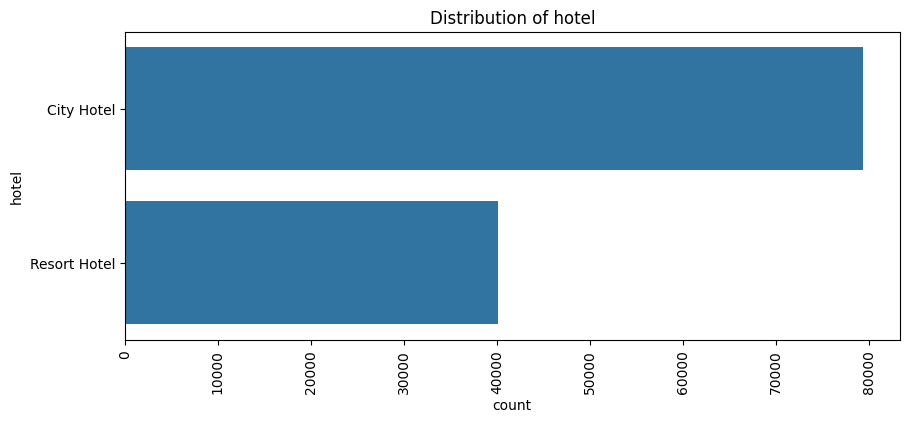

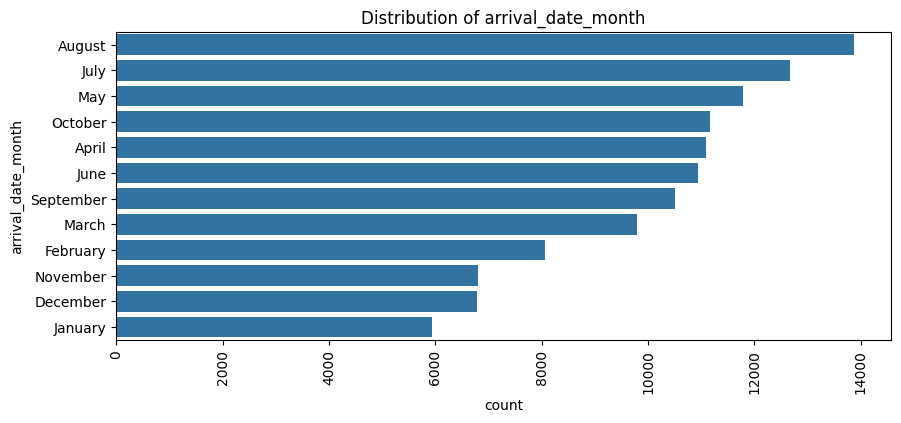

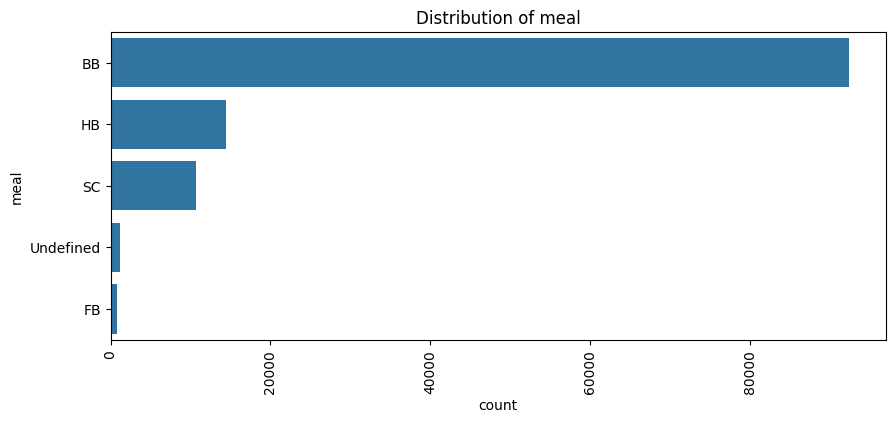

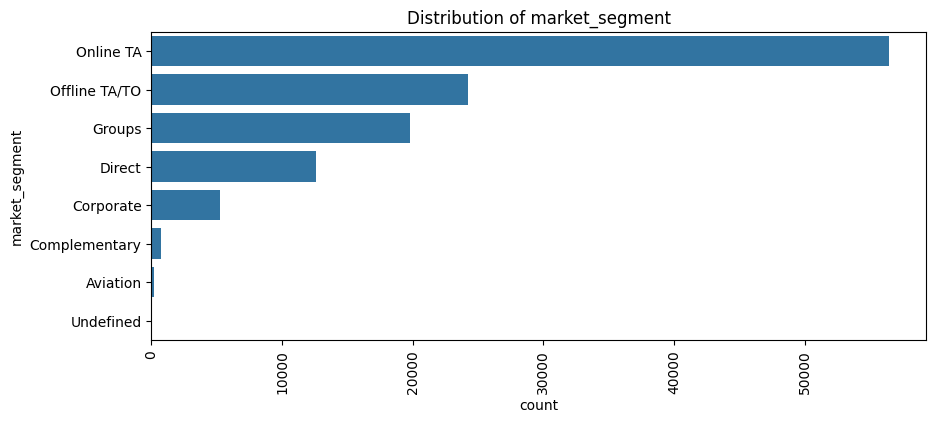

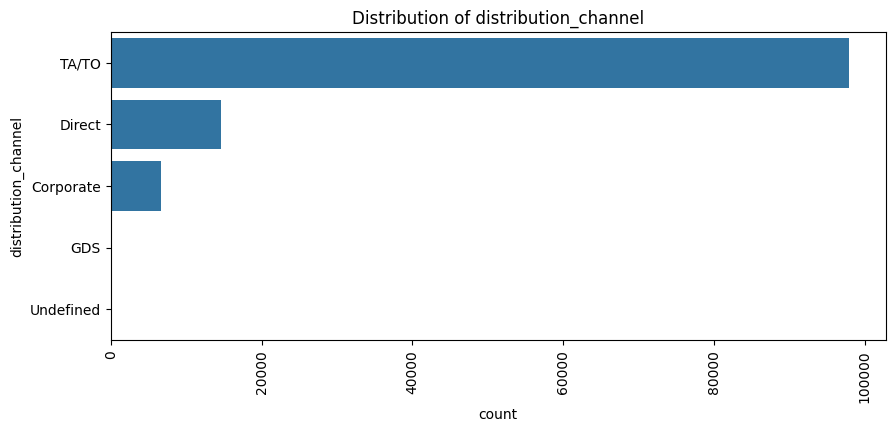

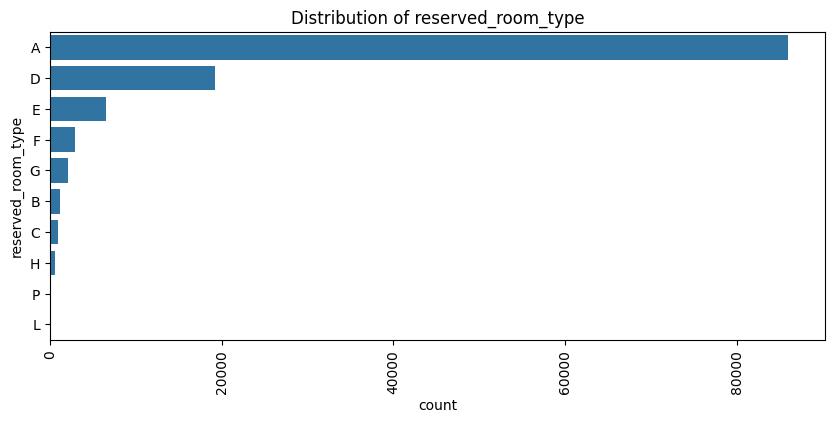

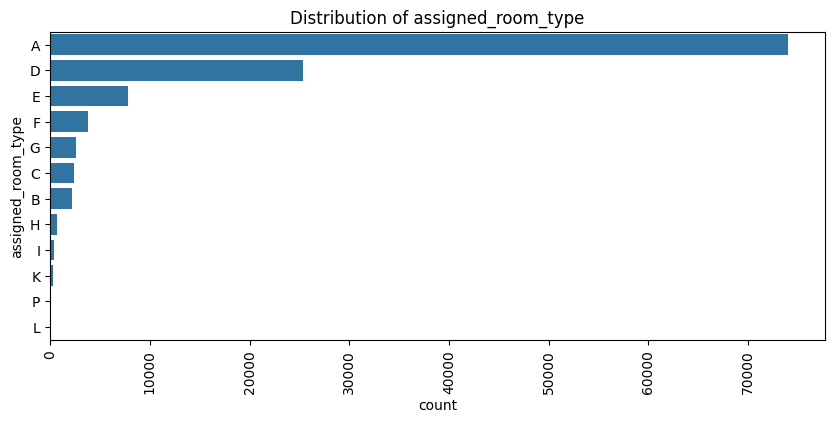

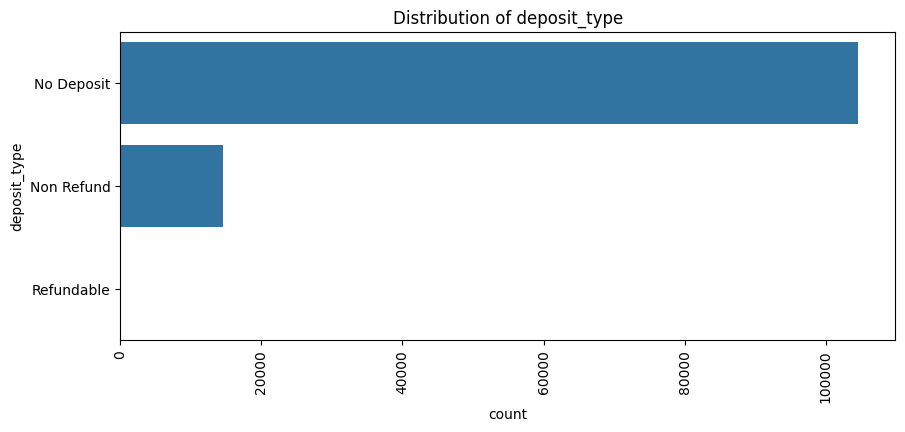

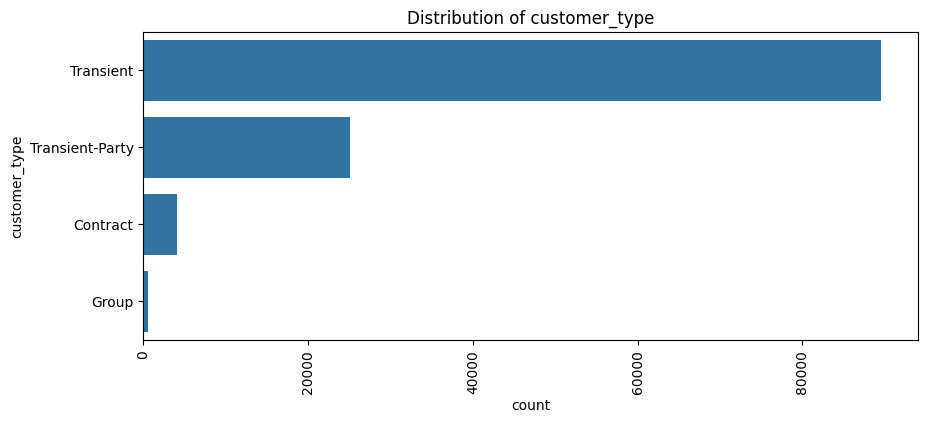

In [12]:
categorical_features = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[feature], order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

## Multivariate Analysis

### Pivot Tables

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_13056/2762735114.py:1: FutureWarning: The provided callable <function mean at 0x103e07790> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(data, values='adr', index='arrival_date_month', columns='hotel', aggfunc=np.mean)


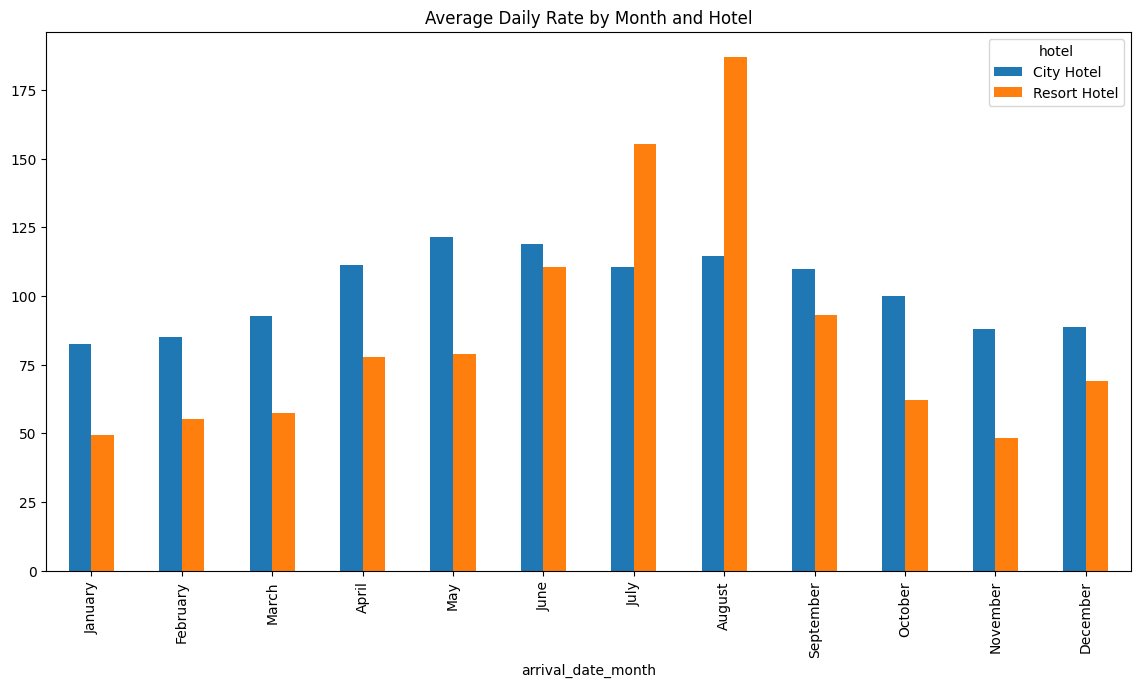

In [13]:
pivot = pd.pivot_table(data, values='adr', index='arrival_date_month', columns='hotel', aggfunc=np.mean)
pivot.plot(kind='bar', figsize=(14, 7))
plt.title('Average Daily Rate by Month and Hotel')
plt.show()

### Heatmap

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_13056/2572258561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_counts = data.groupby(['arrival_date_month', 'hotel']).size().unstack()


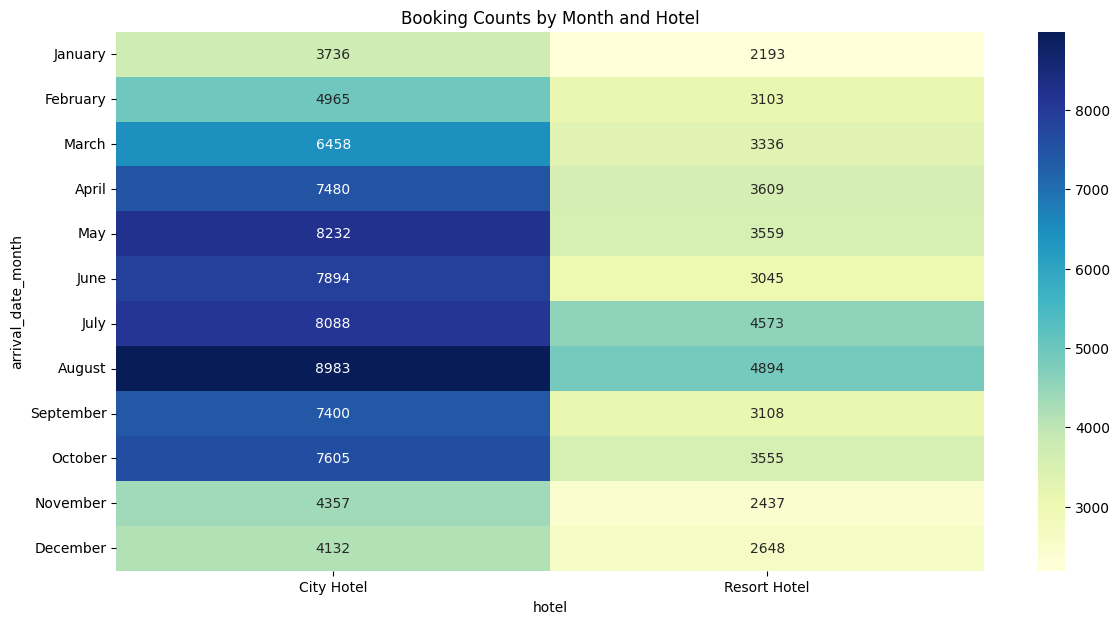

In [14]:
booking_counts = data.groupby(['arrival_date_month', 'hotel']).size().unstack()
plt.figure(figsize=(14, 7))
sns.heatmap(booking_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Booking Counts by Month and Hotel')
plt.show()

## Part 1: Understanding the Seasonality of the Bookings

In [15]:
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str))

### Daily Bookings

In [16]:
daily_bookings = data.groupby('arrival_date').size().reset_index(name='bookings')

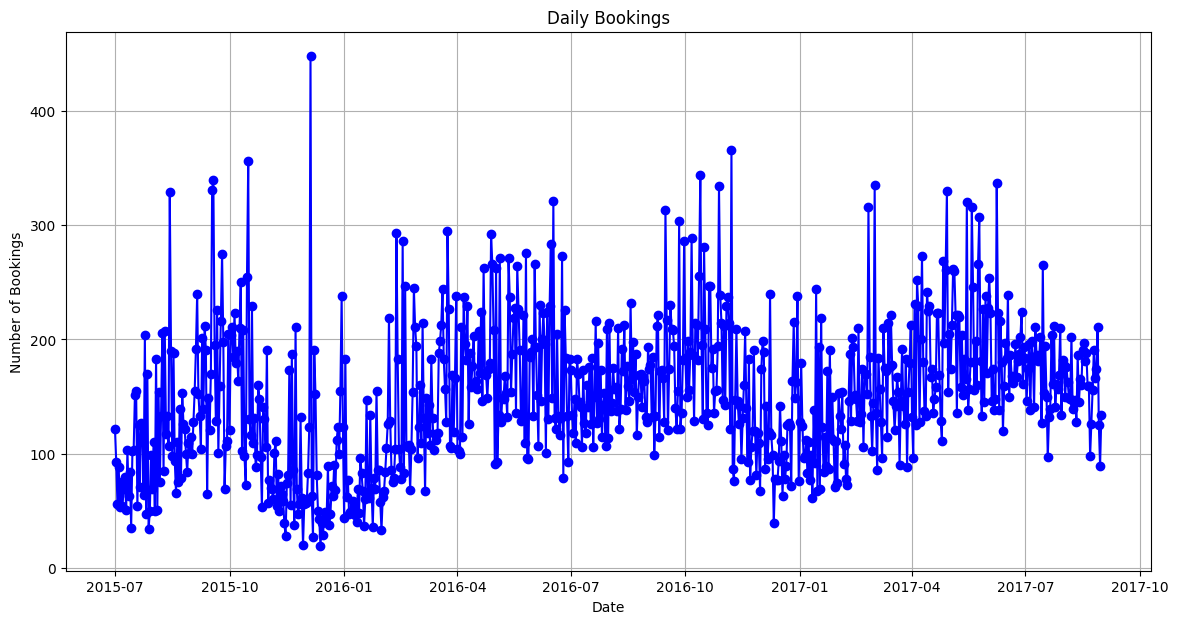

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(daily_bookings['arrival_date'], daily_bookings['bookings'], marker='o', linestyle='-', color='b')
plt.title('Daily Bookings')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

### Weekly Bookings

In [18]:
weekly_bookings = data.resample('W-Mon', on='arrival_date').size().reset_index(name='bookings')

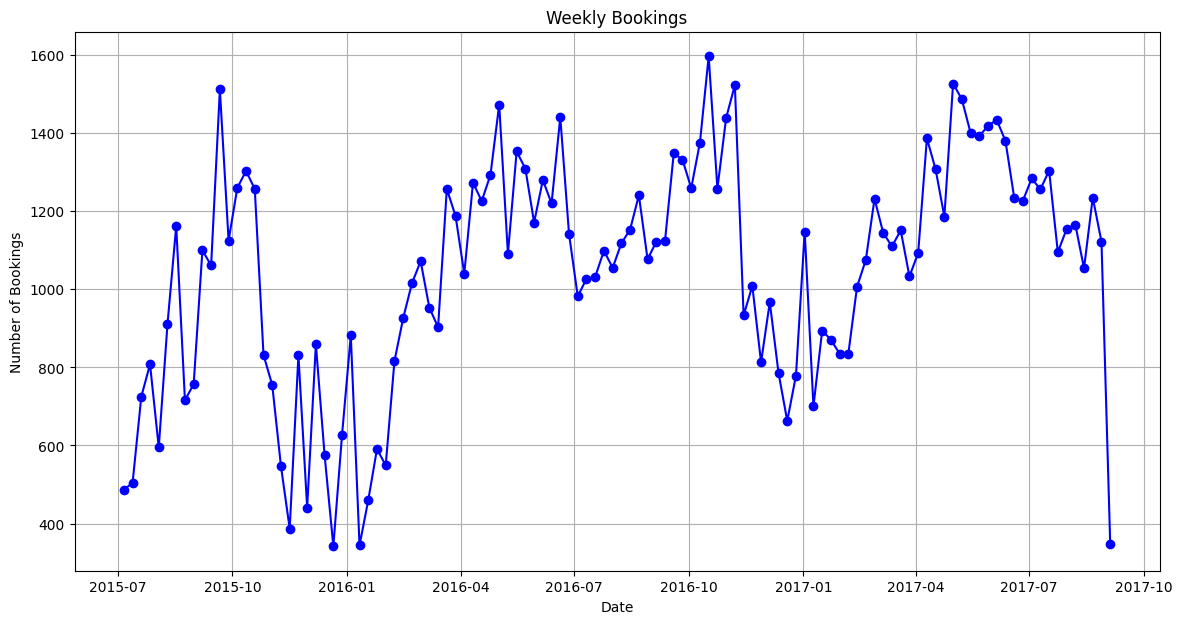

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_bookings['arrival_date'], weekly_bookings['bookings'], marker='o', linestyle='-', color='b')
plt.title('Weekly Bookings')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

### Monthly Bookings

In [20]:
monthly_bookings = data.resample('M', on='arrival_date').size().reset_index(name='bookings')

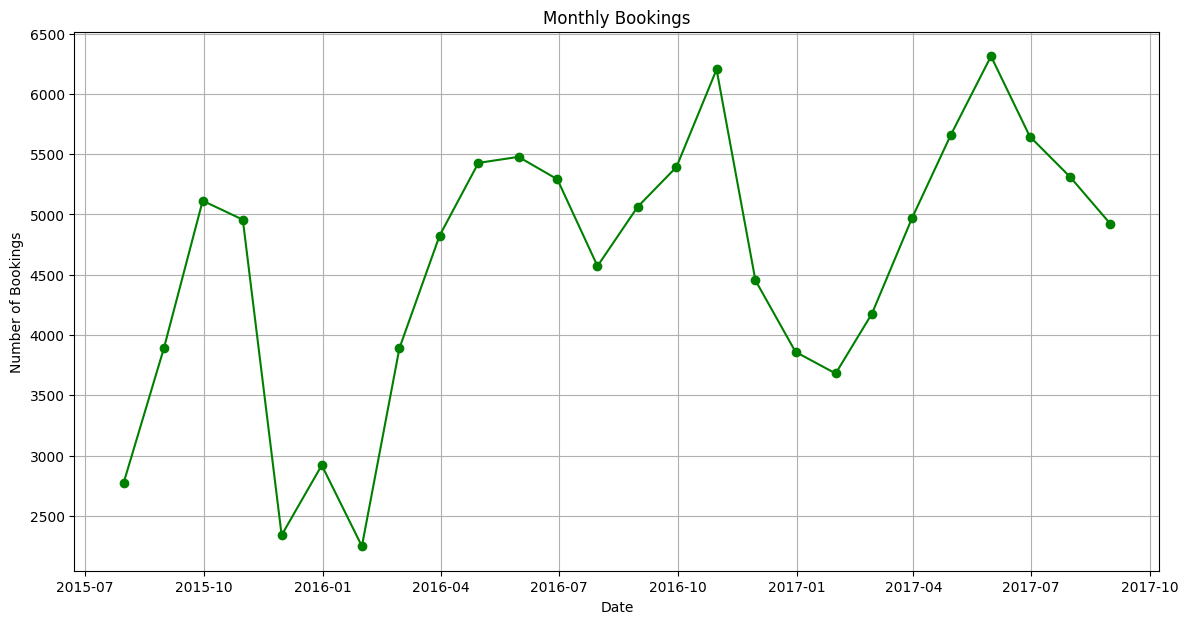

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_bookings['arrival_date'], monthly_bookings['bookings'], marker='o', linestyle='-', color='g')
plt.title('Monthly Bookings')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

### Yearly Bookings

In [22]:
yearly_bookings = data.resample('Y', on='arrival_date').size().reset_index(name='bookings')

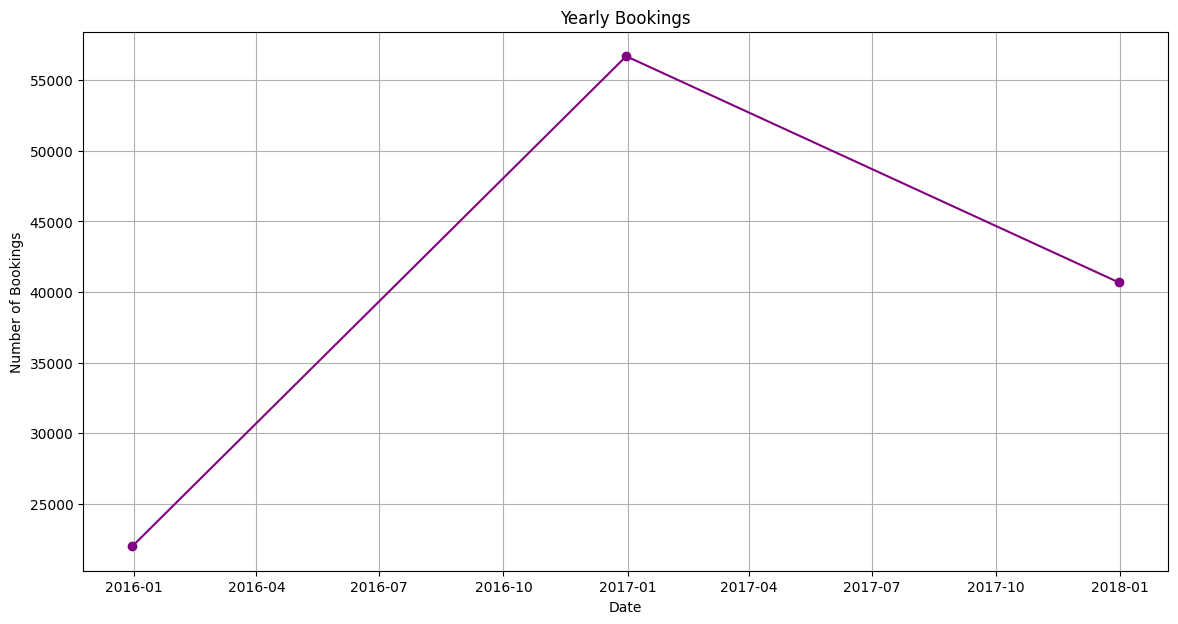

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(yearly_bookings['arrival_date'], yearly_bookings['bookings'], marker='o', linestyle='-', color='purple')
plt.title('Yearly Bookings')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

### Further Monthly Bookings Analysis

In [24]:
data['year_month'] = data['arrival_date'].dt.to_period('M')
daily_bookings_per_month = data.groupby(['year_month', data['arrival_date'].dt.day]).size().reset_index(name='bookings')
daily_bookings_per_month.columns = ['year_month', 'day_of_month', 'bookings']
unique_year_months = daily_bookings_per_month['year_month'].unique()

In [25]:
def plot_monthly_bookings(year_month):
    month_data = daily_bookings_per_month[daily_bookings_per_month['year_month'] == year_month]
    plt.figure(figsize=(12, 6))
    plt.plot(month_data['day_of_month'], month_data['bookings'], marker='o', linestyle='-', color='b')
    plt.title(f'Daily Bookings for {year_month}')
    plt.xlabel('Day of Month')
    plt.ylabel('Number of Bookings')
    plt.grid(True)
    plt.xticks(month_data['day_of_month'])
    plt.show()

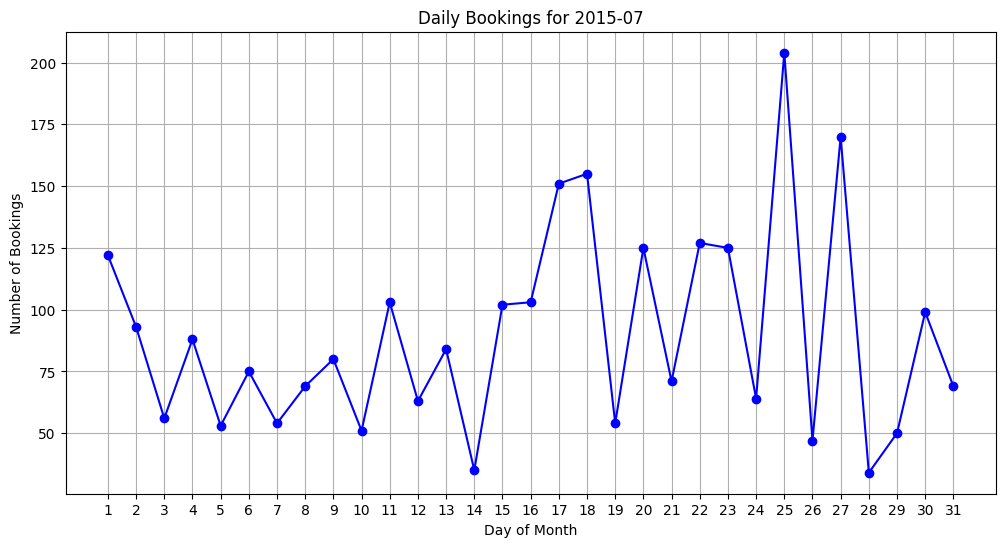

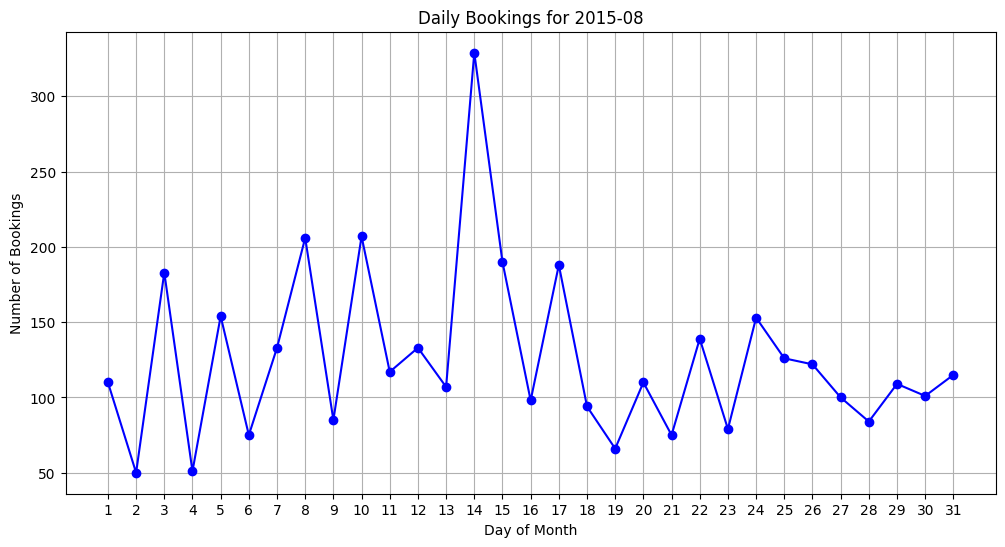

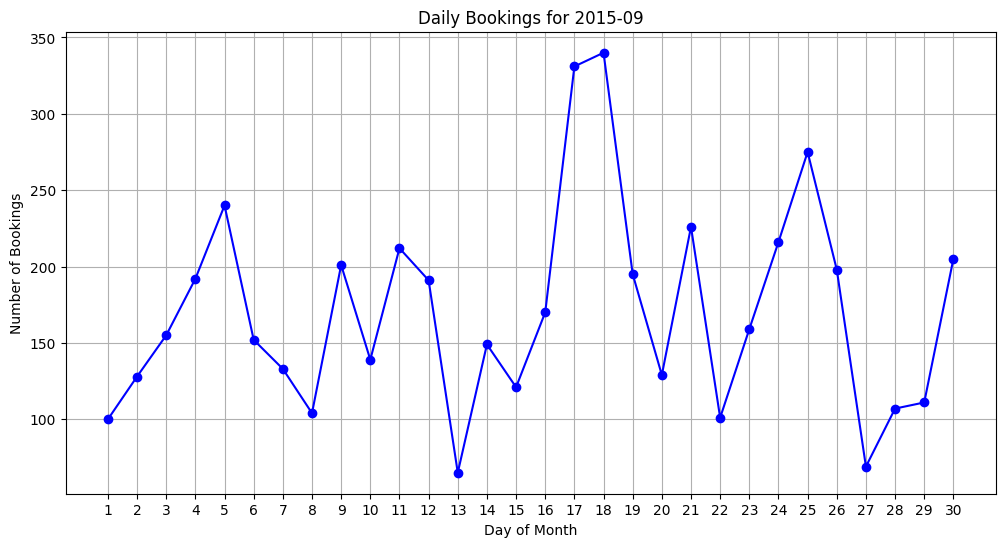

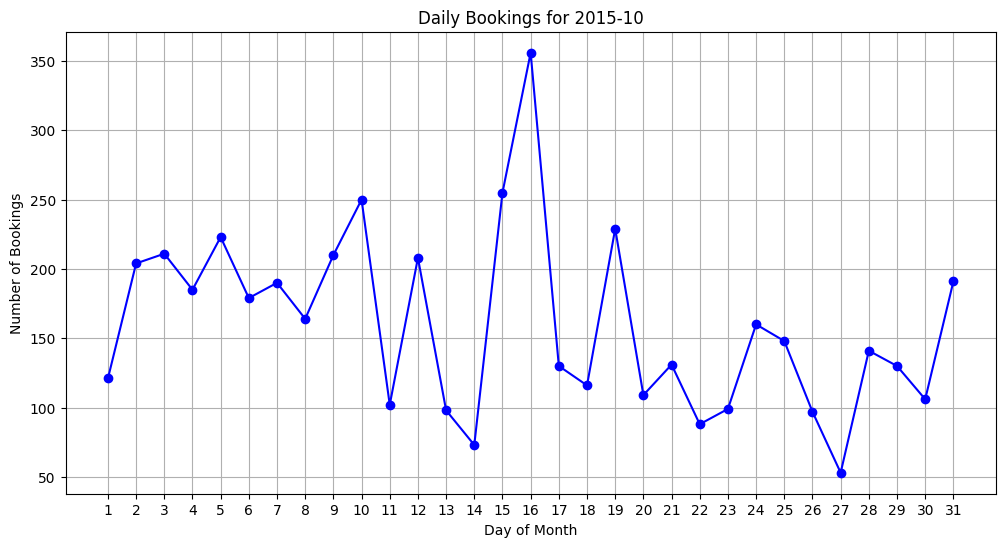

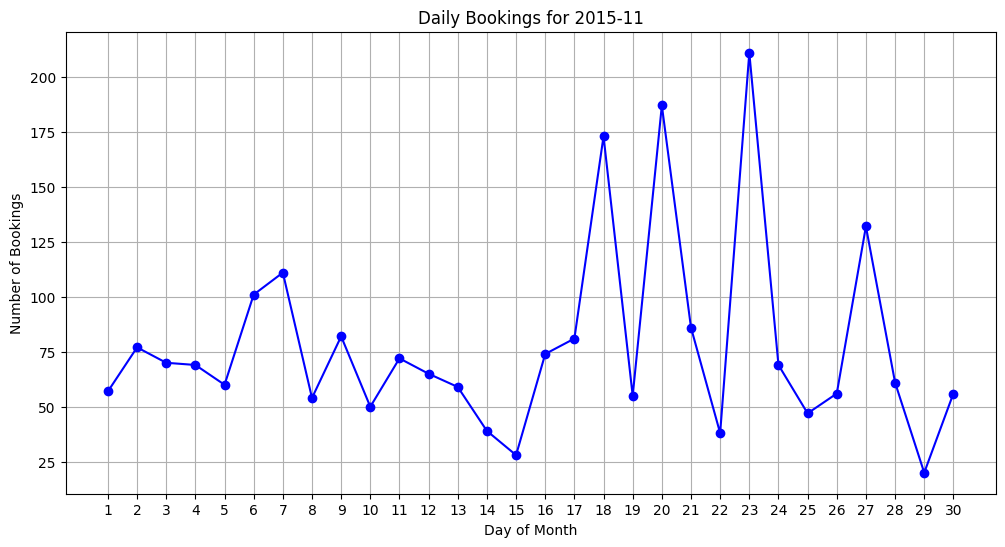

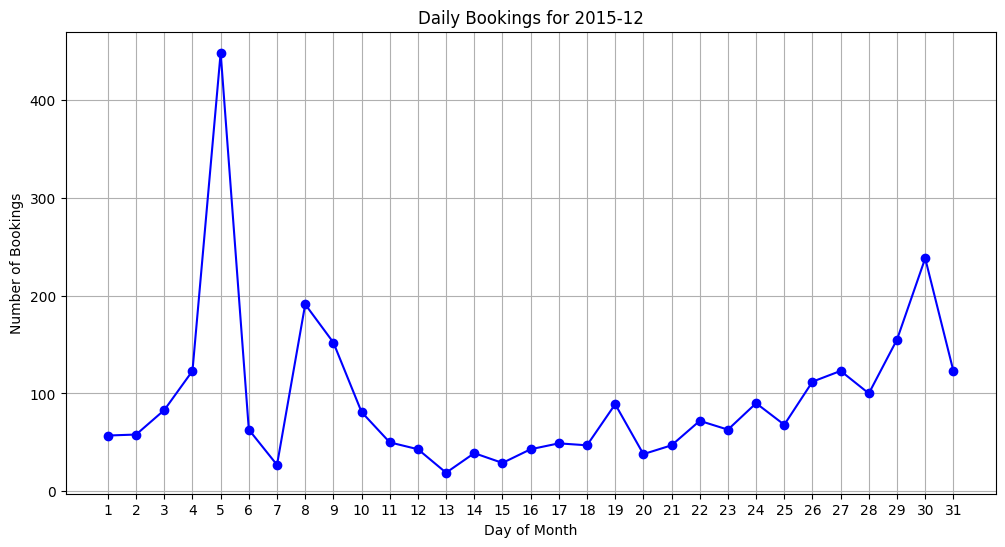

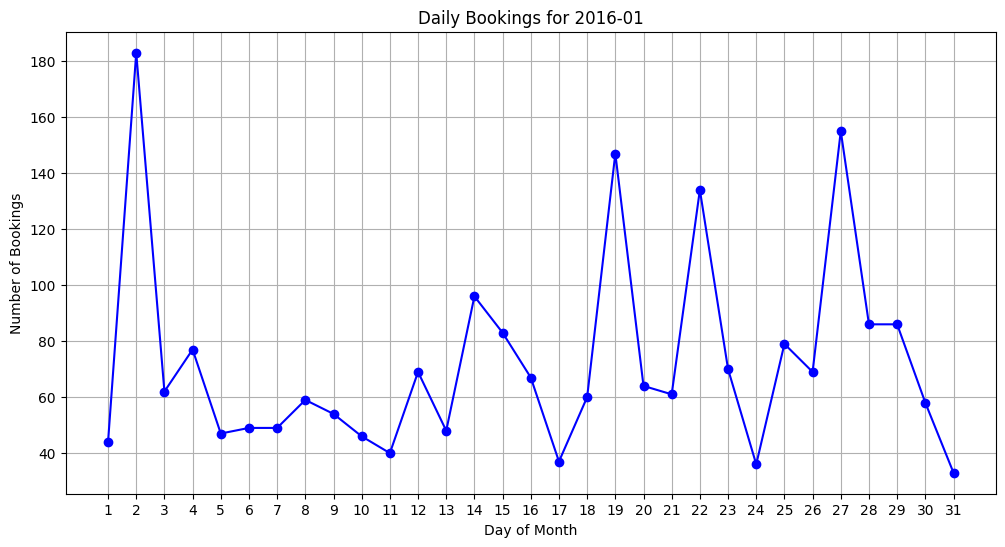

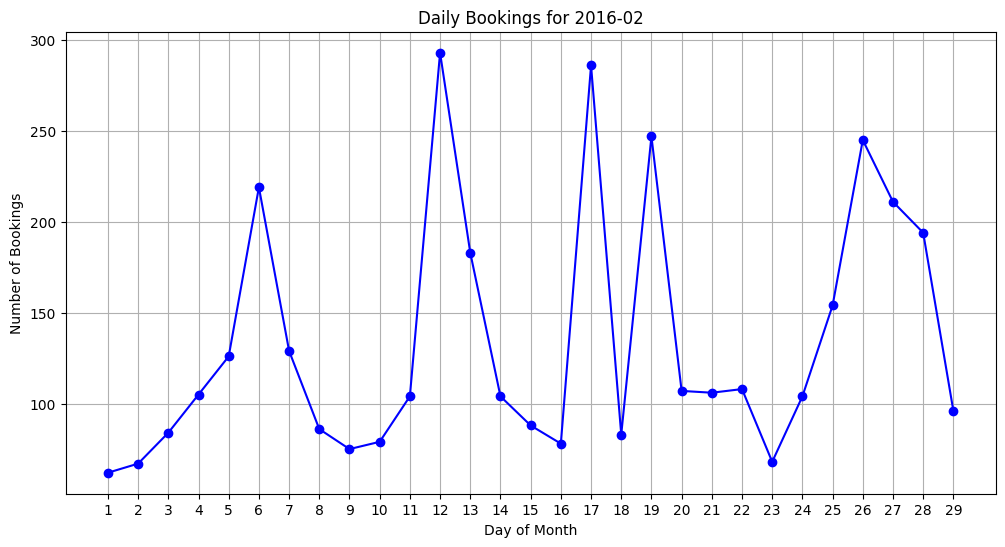

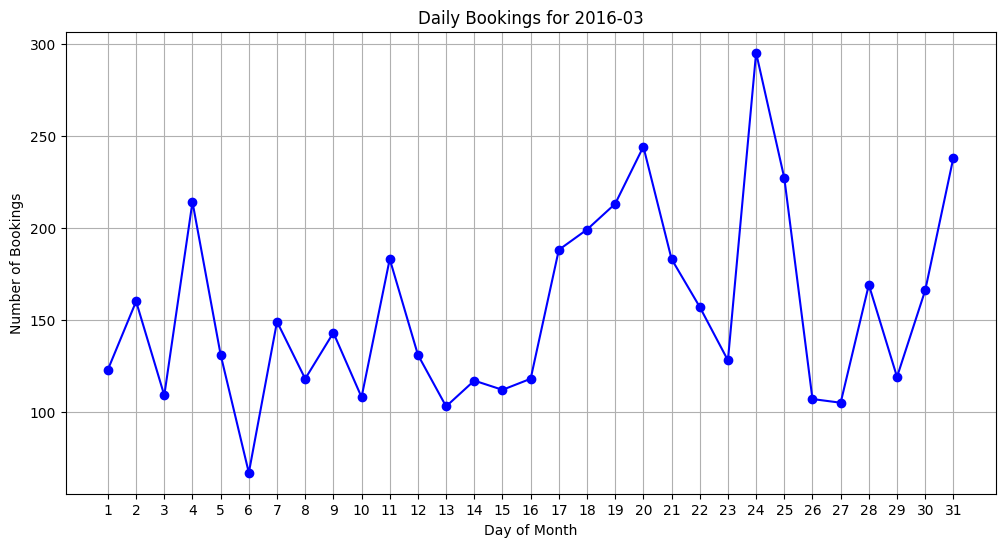

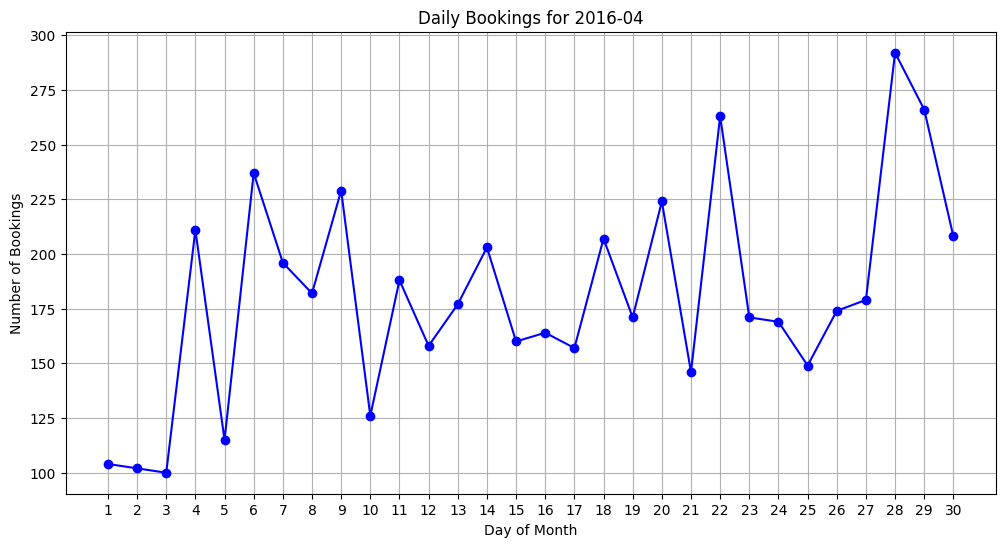

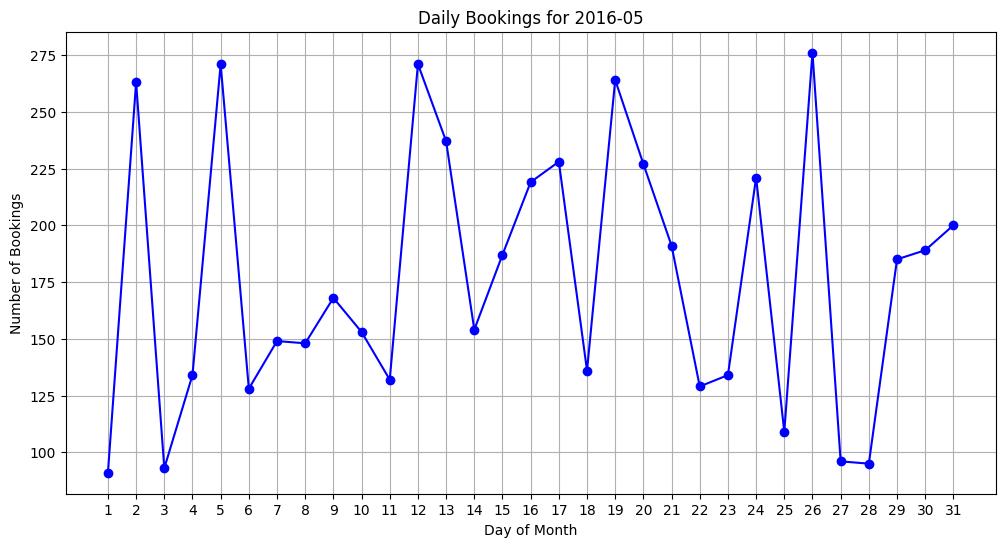

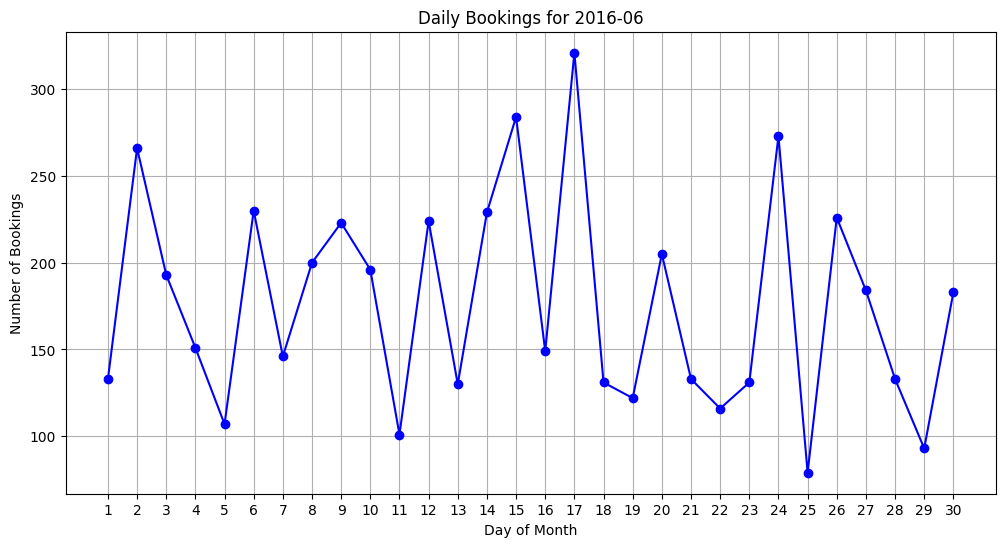

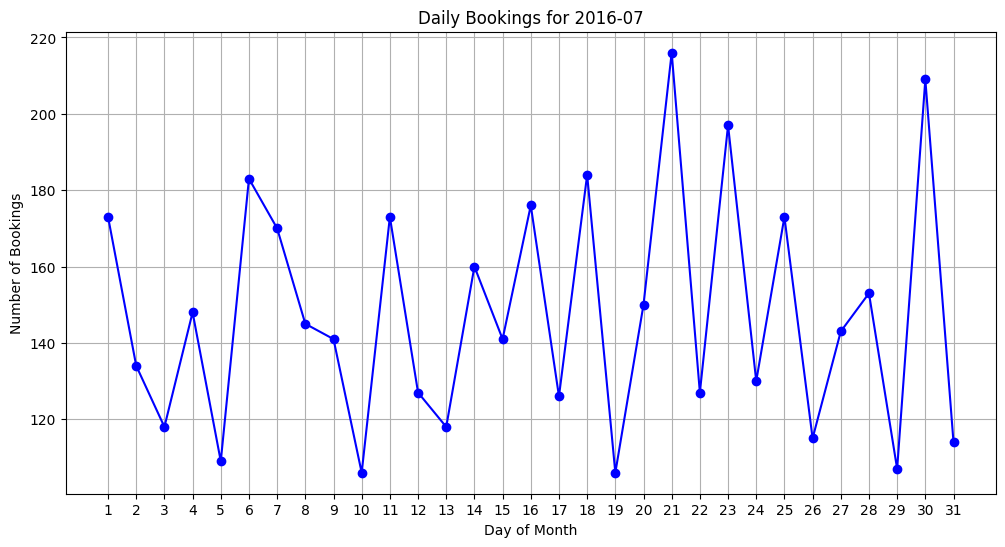

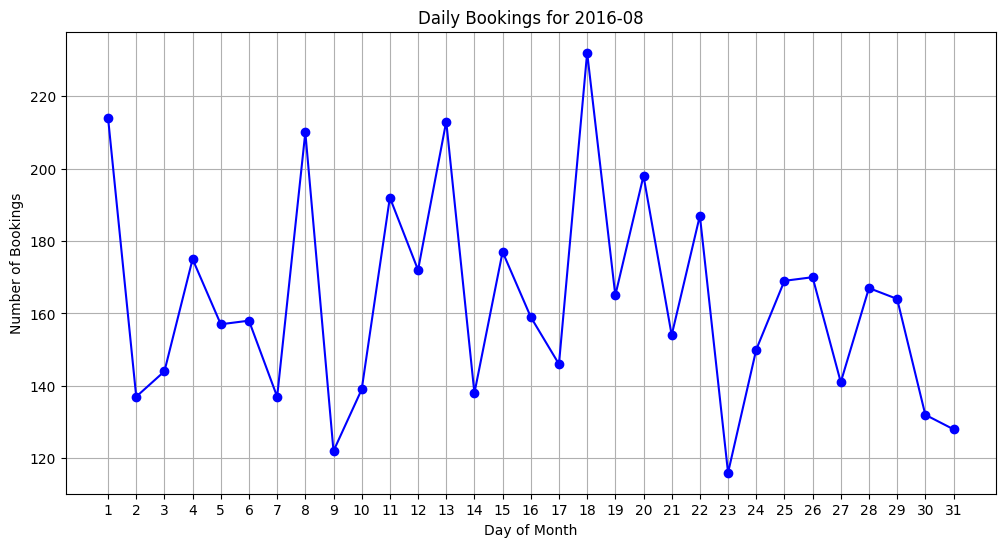

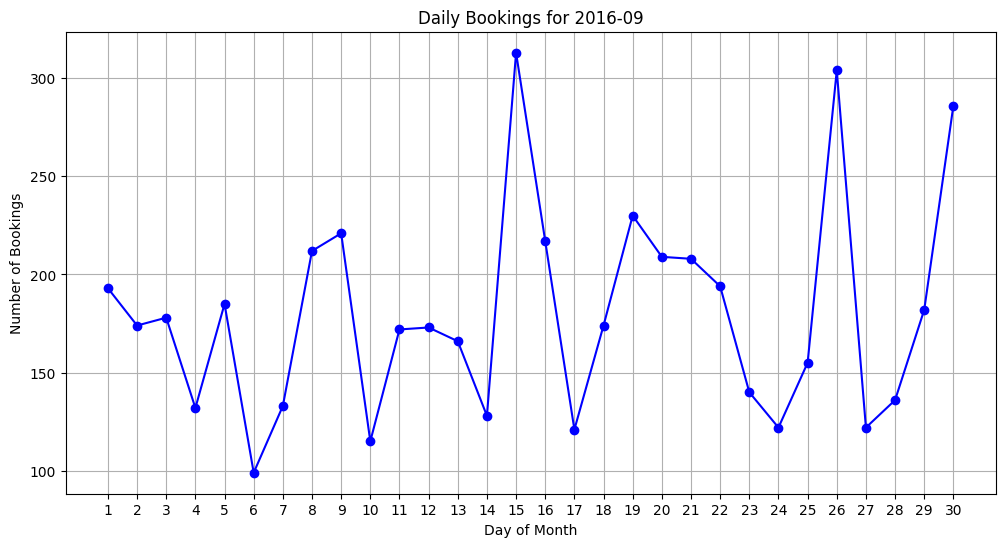

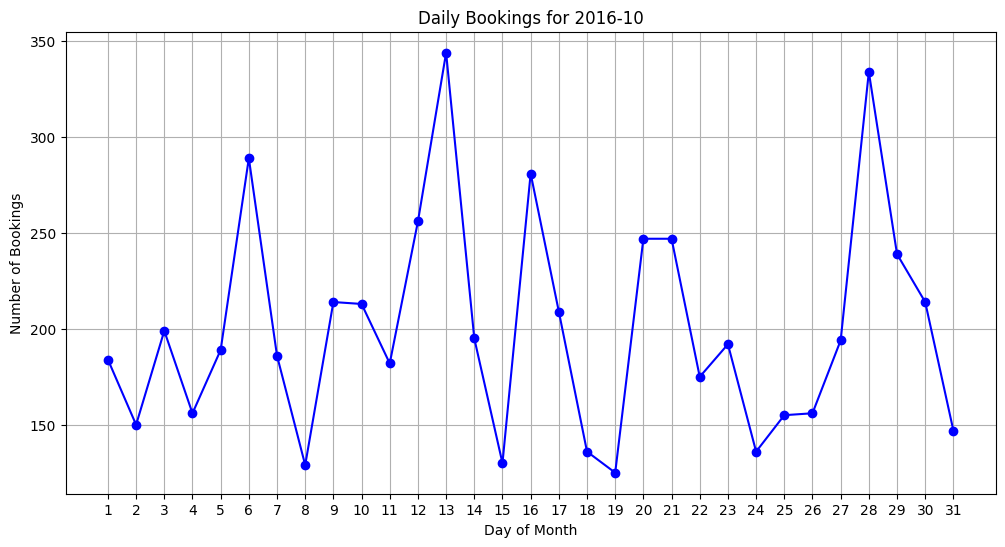

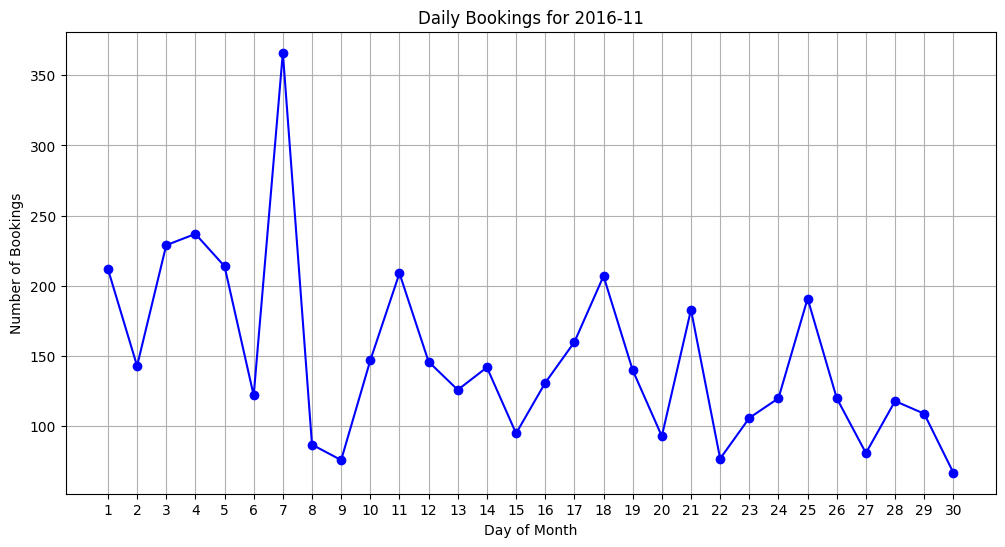

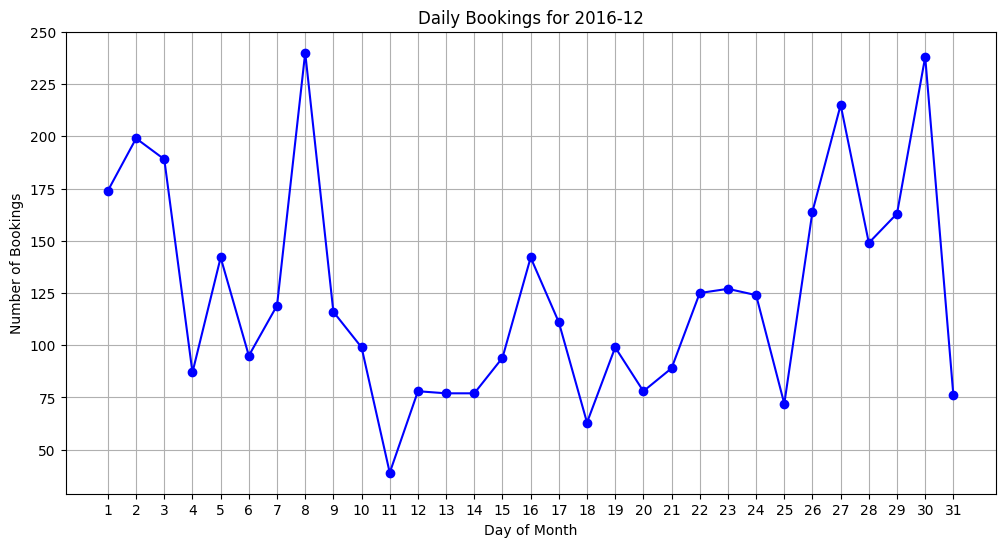

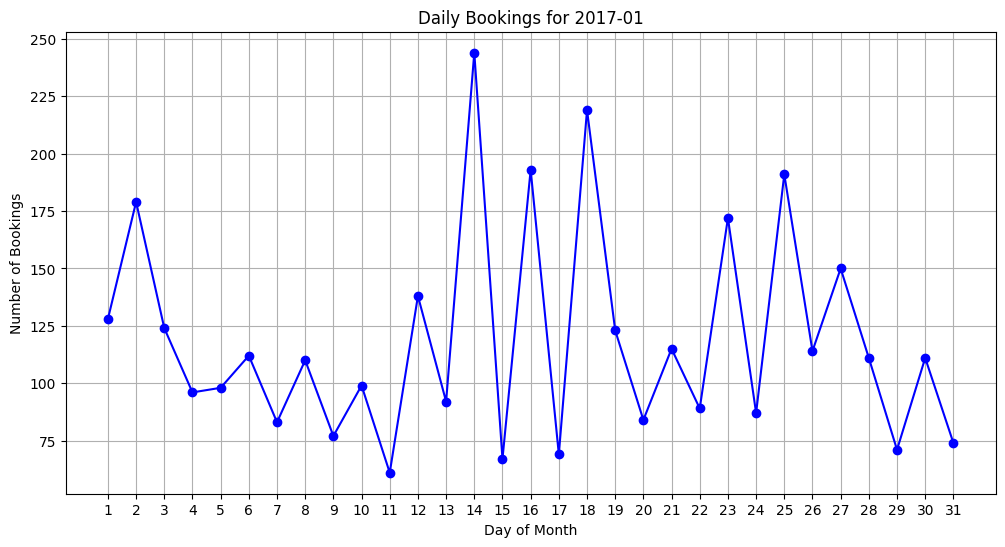

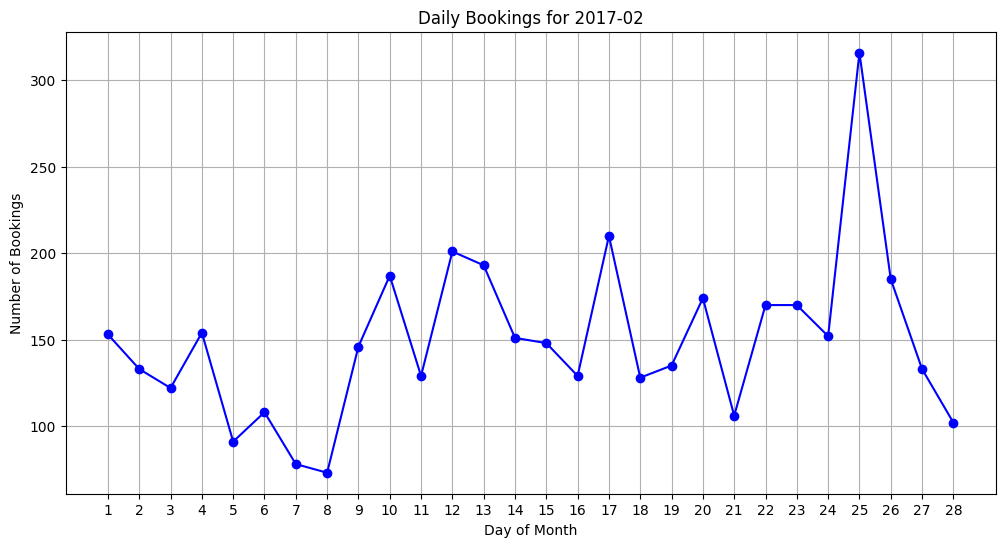

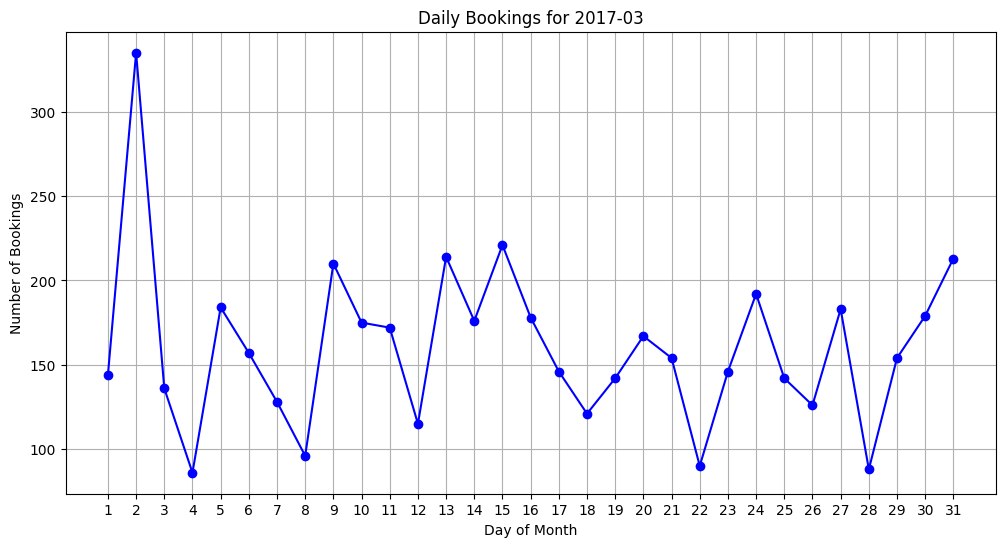

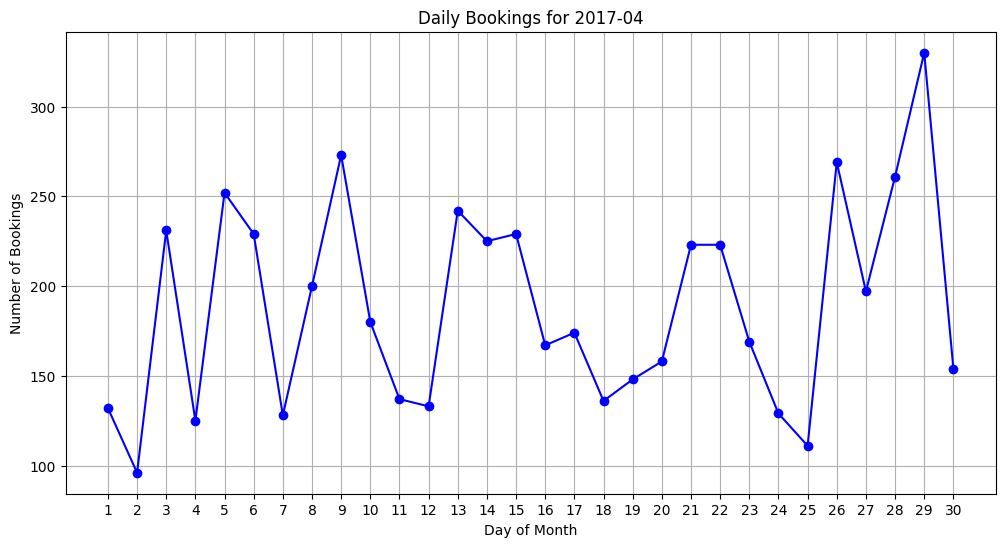

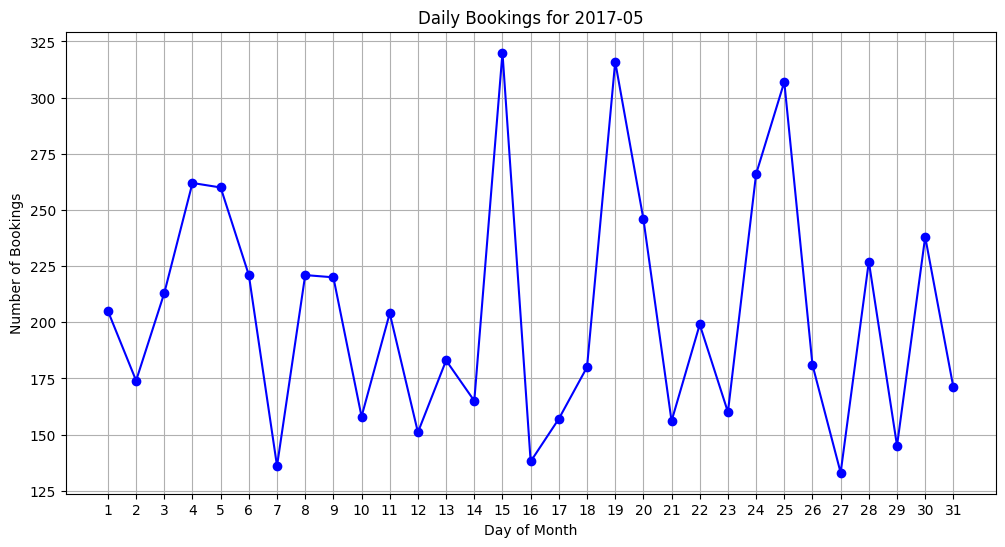

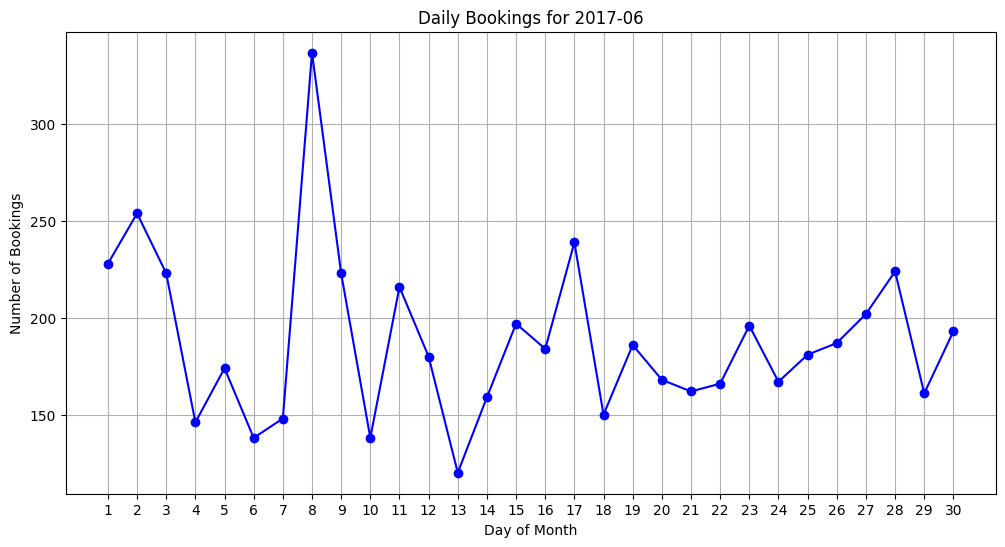

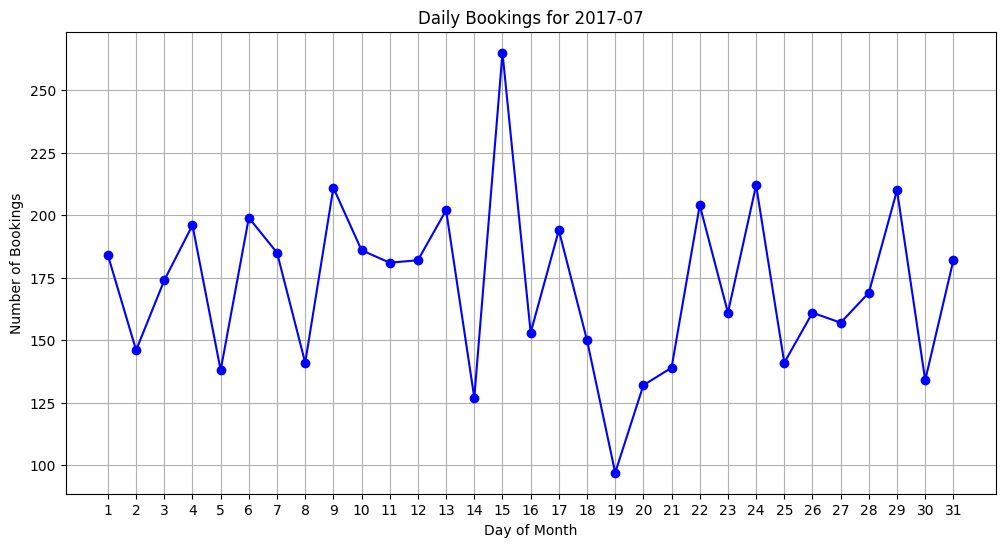

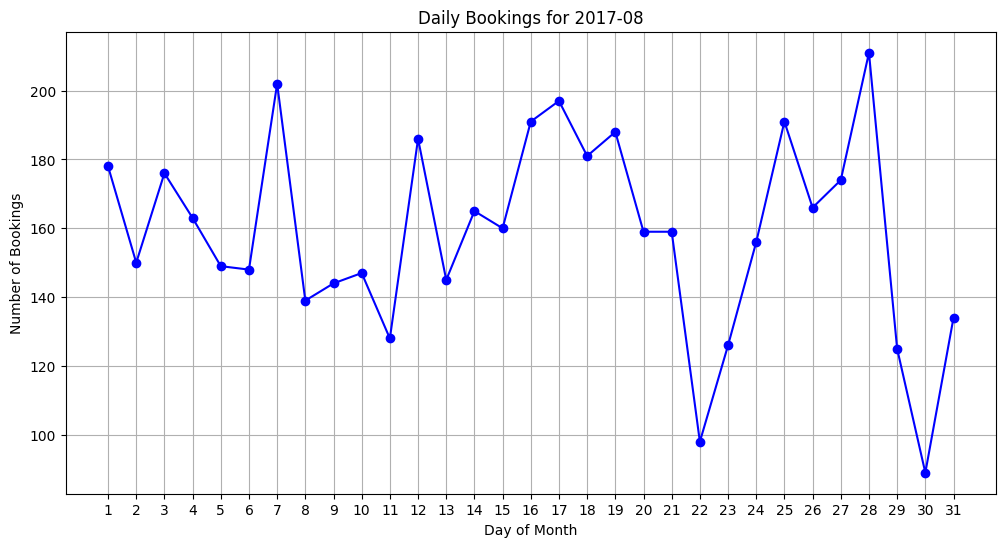

In [26]:
for year_month in unique_year_months:
    plot_monthly_bookings(year_month)

In [27]:
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str))

In [28]:
data['year_month'] = data['arrival_date'].dt.to_period('M')

In [29]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['arrival_date_month_num'] = data['arrival_date_month'].map(month_map)

In [30]:
monthly_bookings = data.groupby(['arrival_date_year', 'arrival_date_month_num']).size().reset_index(name='bookings')

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_13056/1748456502.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bookings = data.groupby(['arrival_date_year', 'arrival_date_month_num']).size().reset_index(name='bookings')


In [31]:
monthly_bookings_pivot = monthly_bookings.pivot(index='arrival_date_year', columns='arrival_date_month_num', values='bookings')

In [32]:
monthly_bookings_pivot = monthly_bookings_pivot.fillna(0)

In [33]:
monthly_bookings_pivot.columns = [pd.to_datetime(str(month), format='%m').strftime('%B') for month in monthly_bookings_pivot.columns]

monthly_bookings_pivot

,January,February,March,April,May,June,July,August,September,October,November,December
arrival_date_year,,,,,,,,,,,,
2015,0,0,0,0,0,0,2776,3889,5114,4957,2340,2920
2016,2248,3891,4824,5428,5478,5292,4572,5063,5394,6203,4454,3860
2017,3681,4177,4970,5661,6313,5647,5313,4925,0,0,0,0


### Price Model

In [34]:
season_categories = {
    'Peak Season': ['July', 'August', 'September'],
    'High Season': ['April', 'May', 'October'],
    'Mid Season': ['March', 'June', 'November'],
    'Low Season': ['January', 'February', 'December']
}

In [35]:
month_to_season = {}
for season, months in season_categories.items():
    for month in months:
        month_to_season[month] = season

In [36]:
data['arrival_month_name'] = data['arrival_date'].dt.strftime('%B')
data['season'] = data['arrival_month_name'].map(month_to_season)

In [37]:
price_multipliers = {
    'Peak Season': 1.5,
    'High Season': 1.3,
    'Mid Season': 1.1,
    'Low Season': 0.9
}

In [38]:
data['price_multiplier'] = data['season'].map(price_multipliers)

In [39]:
price_model_summary = pd.DataFrame([
    {'Month': month, 'Season': season, 'Price Multiplier': price_multipliers.get(season, 'N/A')}
    for month, season in month_to_season.items()
]).sort_values(by='Price Multiplier', ascending=False)

print(price_model_summary)

        Month       Season  Price Multiplier
0        July  Peak Season               1.5
1      August  Peak Season               1.5
2   September  Peak Season               1.5
3       April  High Season               1.3
4         May  High Season               1.3
5     October  High Season               1.3
6       March   Mid Season               1.1
7        June   Mid Season               1.1
8    November   Mid Season               1.1
9     January   Low Season               0.9
10   February   Low Season               0.9
11   December   Low Season               0.9


## Part 2: Creating the Shape of Future Hotel Packages

In [40]:
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [41]:
print(data['total_stay'].isnull().sum())

0


In [42]:
print(data['total_stay'].describe())

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_stay, dtype: float64


In [43]:
stay_counts = data['total_stay'].value_counts().sort_index()
stay_counts_df = stay_counts.reset_index()
stay_counts_df.columns = ['total_stay', 'count']

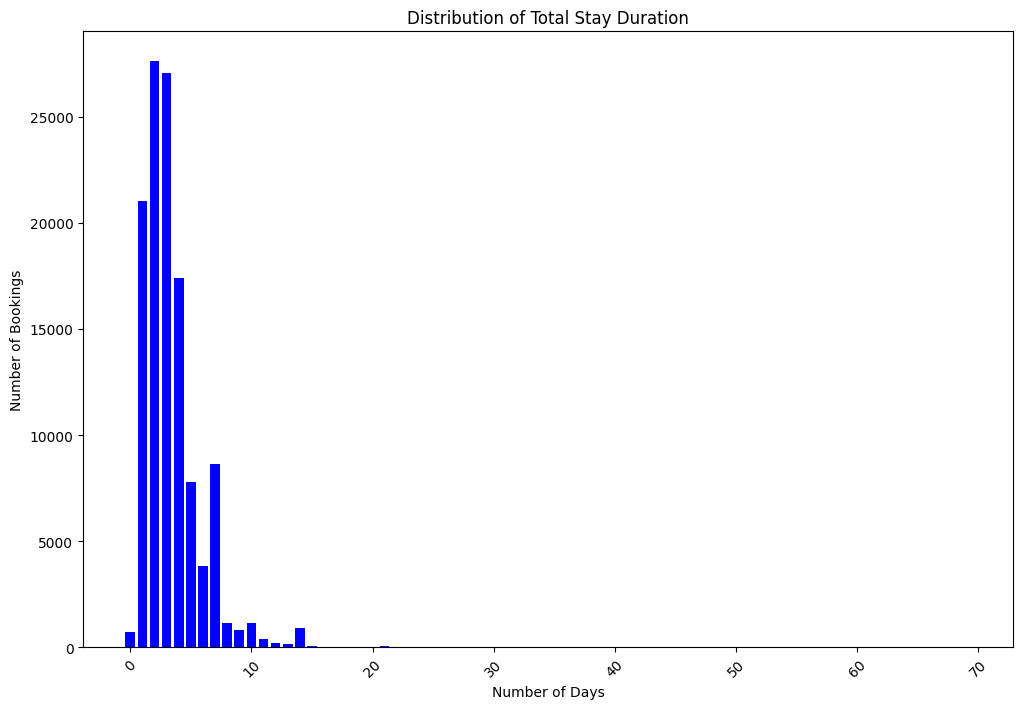

In [44]:
plt.figure(figsize=(12, 8))
plt.bar(stay_counts_df['total_stay'], stay_counts_df['count'], color='blue')
plt.title('Distribution of Total Stay Duration')
plt.xlabel('Number of Days')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [45]:
stay_counts_df = stay_counts_df.sort_values(by='total_stay')

In [46]:
print(stay_counts_df)

    total_stay  count
0            0    715
1            1  21020
2            2  27643
3            3  27076
4            4  17383
5            5   7784
6            6   3857
7            7   8655
8            8   1161
9            9    841
10          10   1139
11          11    396
12          12    223
13          13    142
14          14    916
15          15     75
16          16     40
17          17     20
18          18     35
19          19     22
20          20     14
21          21     71
22          22     14
23          23      8
24          24      6
25          25     37
26          26      6
27          27      5
28          28     35
29          29     14
30          30     13
31          33      3
32          34      1
33          35      5
34          38      1
35          42      4
36          43      1
37          45      1
38          46      1
39          48      1
40          49      1
41          56      2
42          57      1
43          60      1
44        

### Distribution of Packages

In [47]:
packages = {
    'Short Stay': (1, 3),
    'Medium Stay': (4, 6),
    'Long Stay': (7, 10),
    'Extended Stay': (11, float('inf'))
}

In [48]:
def assign_package(total_stay):
    for package, (min_days, max_days) in packages.items():
        if min_days <= total_stay <= max_days:
            return package
    return 'Other'

data['package'] = data['total_stay'].apply(assign_package)

In [49]:
package_counts = data['package'].value_counts().sort_index()

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_13056/2107437057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=package_counts.index, y=package_counts.values, palette='viridis')


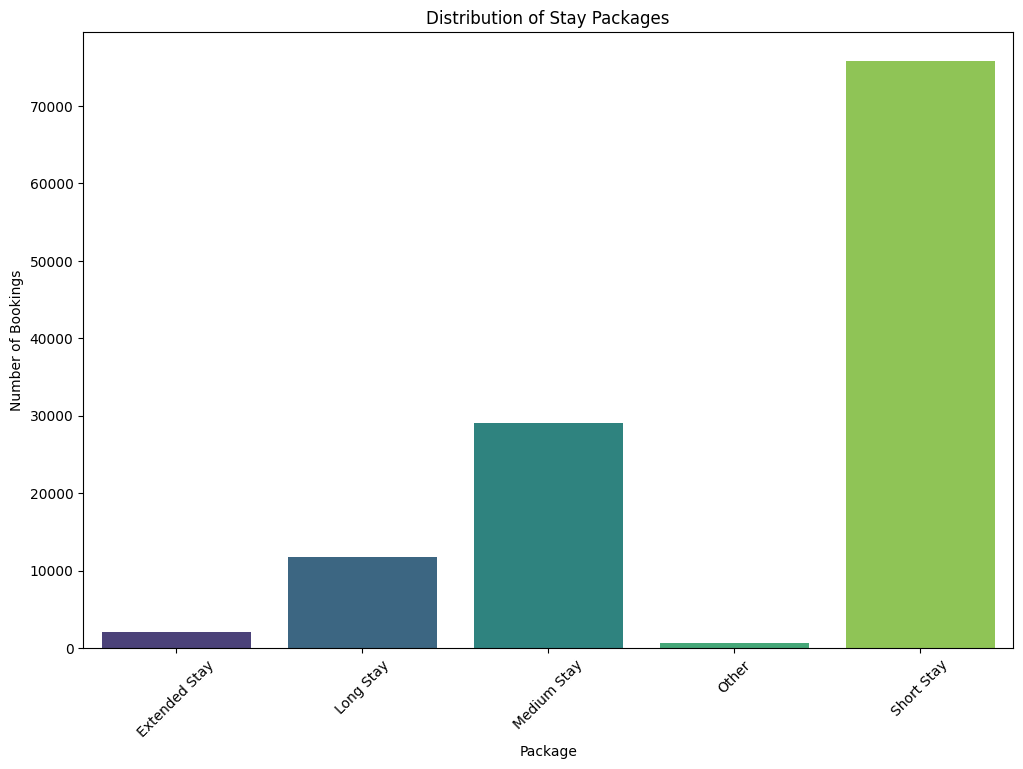

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x=package_counts.index, y=package_counts.values, palette='viridis')
plt.title('Distribution of Stay Packages')
plt.xlabel('Package')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

### Proposed Packages

In [51]:
updated_packages = {
    'One Night': 1,
    'Getaway': (2, 3),
    'Retreat': (4, 5),
    'One-Week Vacation': (6, 7),
    'Extended Stay': (8, 14),
    'Long Term Stay': (15, float('inf'))
}

In [52]:
def assign_updated_package(total_stay):
    for package, duration in updated_packages.items():
        if isinstance(duration, tuple):
            min_days, max_days = duration
            if min_days <= total_stay <= max_days:
                return package
        elif total_stay == duration:
            return package
    return 'Other'

data['updated_package'] = data['total_stay'].apply(assign_updated_package)

In [53]:
updated_package_counts = data['updated_package'].value_counts().sort_index()

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_13056/3172508063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=updated_package_counts.index, y=updated_package_counts.values, palette='viridis')


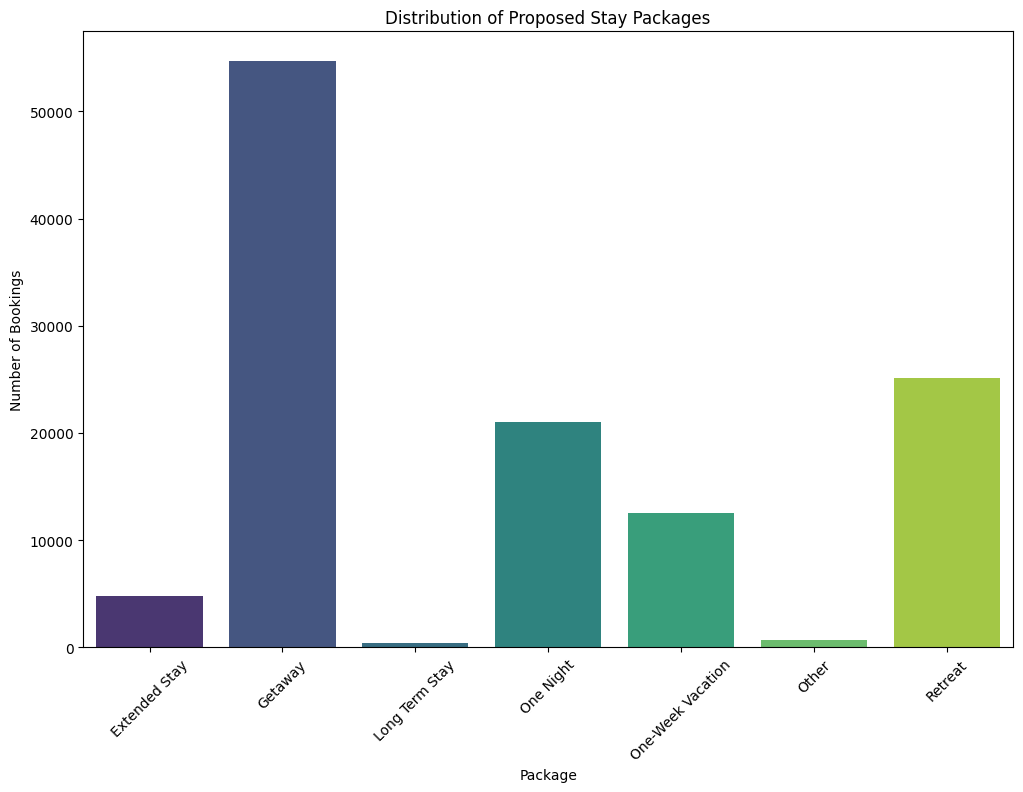

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x=updated_package_counts.index, y=updated_package_counts.values, palette='viridis')
plt.title('Distribution of Proposed Stay Packages')
plt.xlabel('Package')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [55]:
other_category_data_updated = data[data['updated_package'] == 'Other']
other_stay_counts_updated = other_category_data_updated['total_stay'].value_counts().sort_index()
other_stay_counts_df_updated = other_stay_counts_updated.reset_index()
other_stay_counts_df_updated.columns = ['total_stay', 'count']
print(other_stay_counts_df_updated)

   total_stay  count
0           0    715


## Part 3: Comprehending the Cancellation Foundations

In [56]:
canceled_data = data[data['is_canceled'] == 1]
canceled_data['days_until_arrival'] = (canceled_data['arrival_date'] - pd.to_datetime(canceled_data['reservation_status_date'])).dt.days

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_13056/4233803905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_data['days_until_arrival'] = (canceled_data['arrival_date'] - pd.to_datetime(canceled_data['reservation_status_date'])).dt.days


In [57]:
print(canceled_data['days_until_arrival'].describe())

count    44224.000000
mean        85.880630
std         90.694686
min          0.000000
25%         17.000000
50%         54.000000
75%        127.000000
max        526.000000
Name: days_until_arrival, dtype: float64


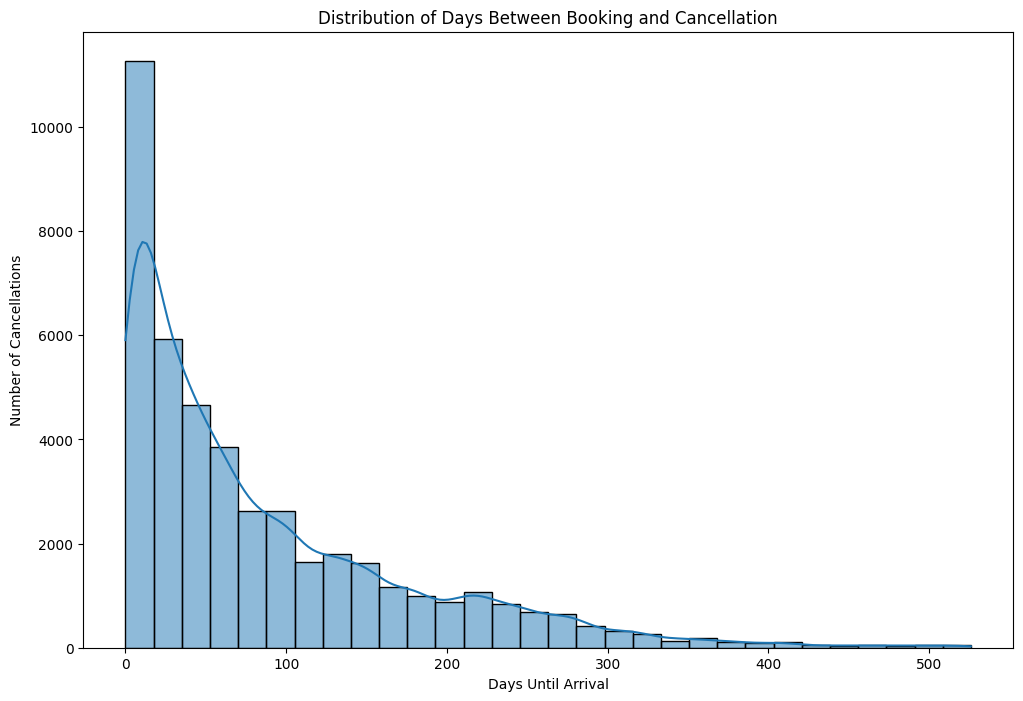

In [58]:
plt.figure(figsize=(12, 8))
sns.histplot(canceled_data['days_until_arrival'], bins=30, kde=True)
plt.title('Distribution of Days Between Booking and Cancellation')
plt.xlabel('Days Until Arrival')
plt.ylabel('Number of Cancellations')
plt.show()

### Cancellation Budget Estimate

In [59]:
data['potential_revenue'] = data['adr'] * data['total_stay']

In [60]:
canceled_data = data[data['is_canceled'] == 1]

In [61]:
total_cancellation_budget = canceled_data['potential_revenue'].sum()
print(f'Total Cancellation Budget: {total_cancellation_budget}')

Total Cancellation Budget: 16727237.120000001


### Penalty Periods

In [62]:
penalty_periods = [
    (365, 100, 0.20),  
    (99, 36, 0.40),
    (35, 22, 0.50), 
    (21, 11, 0.60),    
    (10, 4, 0.80),     
    (3, 0, 0.95)       
]

In [63]:
def calculate_penalty(days_until_arrival, potential_revenue):
    for from_days, to_days, penalty_percentage in penalty_periods:
        if from_days >= days_until_arrival >= to_days:
            return potential_revenue * penalty_percentage
    return 0

In [64]:
canceled_data['penalty'] = canceled_data.apply(
    lambda x: calculate_penalty(x['days_until_arrival'], x['potential_revenue']), axis=1)

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_13056/241668240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_data['penalty'] = canceled_data.apply(


### Recovered Cancellation Budget

In [65]:
total_recovered = canceled_data['penalty'].sum()
print(f'Total Recovered Amount: {total_recovered}')

Total Recovered Amount: 7301038.328999999


In [66]:
recovered_percentage = (total_recovered / total_cancellation_budget) * 100
print(f'Recovered Percentage: {recovered_percentage}%')

Recovered Percentage: 43.647604661922784%


In [67]:
if recovered_percentage >= 25:
    print("The proposed penalties help save at least 25% of the cancellations budget.")
else:
    print("The proposed penalties do not meet the 25% savings target. Consider revising the penalties.")

The proposed penalties help save at least 25% of the cancellations budget.


## Part 4: Preparing the IT Systems for Demand

In [68]:
weekly_bookings = data.groupby(['arrival_date_year', 'arrival_date_week_number']).size().reset_index(name='bookings')

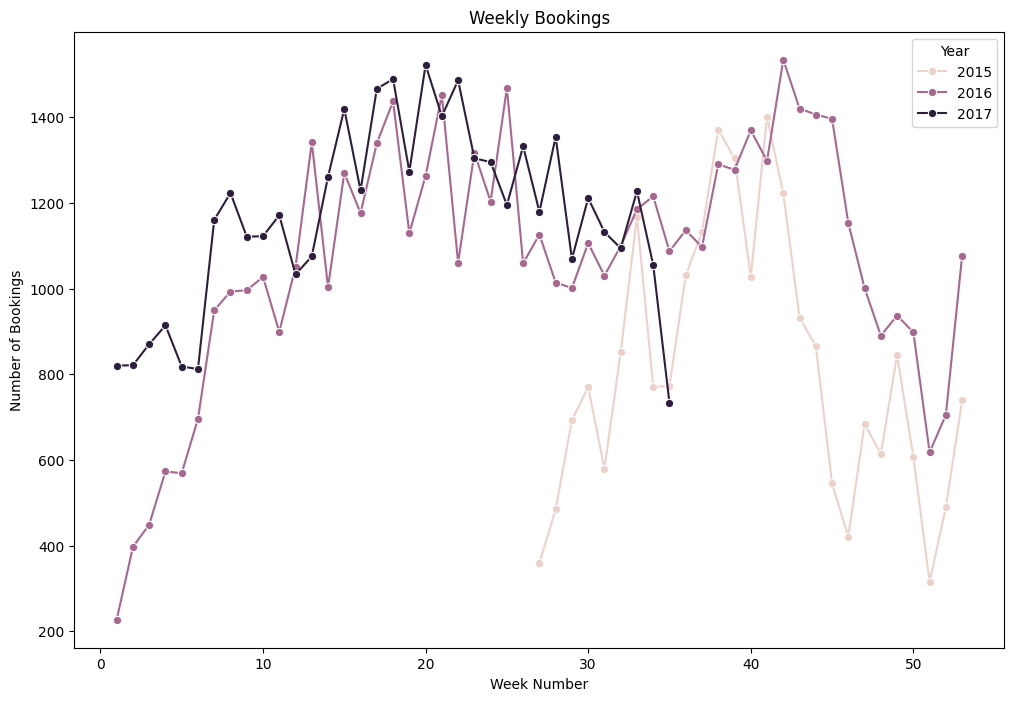

In [69]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='arrival_date_week_number', y='bookings', hue='arrival_date_year', data=weekly_bookings, marker='o')
plt.title('Weekly Bookings')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.legend(title='Year')
plt.show()

### Predicting Demand

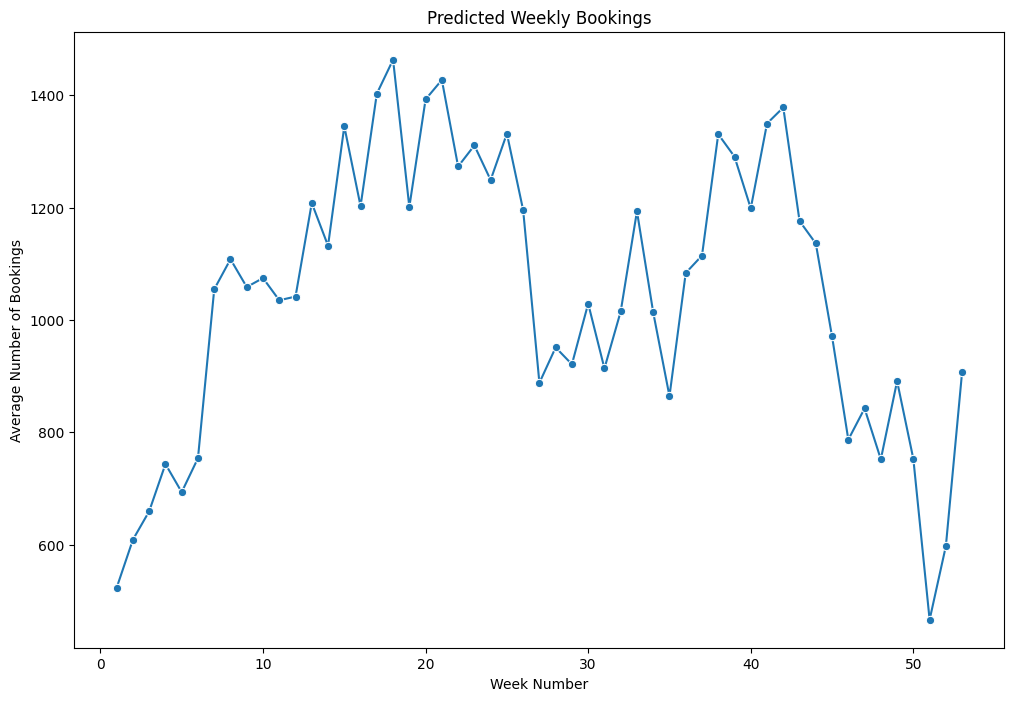

In [70]:
weekly_bookings_avg = weekly_bookings.groupby('arrival_date_week_number')['bookings'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='arrival_date_week_number', y='bookings', data=weekly_bookings_avg, marker='o')
plt.title('Predicted Weekly Bookings')
plt.xlabel('Week Number')
plt.ylabel('Average Number of Bookings')
plt.show()